In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tsr
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Recall


In [2]:
data_path = "/Users/chaitanyadua/Desktop/JustRAIGS_Train_labels.csv"

In [ ]:
df = pd.read_csv(data_path, sep=';', low_memory=False)
df['Final Label'] = df['Final Label'].replace({'RG': 1, 'NRG': 0})
df

In [ ]:
df["Final Label"].hist()
display(plt.show())

As we can see above, there is a big class imbalance above, hence our evaluation metric should also take that into account

In [ ]:
col = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age', 'Label G1', 'Label G2',
       'Label G3', 'G1 ANRS', 'G1 ANRI', 'G1 RNFLDS', 'G1 RNFLDI', 'G1 BCLVS',
       'G1 BCLVI', 'G1 NVT', 'G1 DH', 'G1 LD', 'G1 LC', 'G2 ANRS', 'G2 ANRI',
       'G2 RNFLDS', 'G2 RNFLDI', 'G2 BCLVS', 'G2 BCLVI', 'G2 NVT', 'G2 DH',
       'G2 LD', 'G2 LC', 'G3 ANRS', 'G3 ANRI', 'G3 RNFLDS', 'G3 RNFLDI',
       'G3 BCLVS', 'G3 BCLVI', 'G3 NVT', 'G3 DH', 'G3 LD', 'G3 LC']
to_binary = [ 'Label G1', 'Label G2', 'Label G3', 'Final Label']
df[to_binary] = df[to_binary].replace({'RG': 1, 'NRG': 0, 'U' : 69420})
df['Final Label'].hist()

num = ['Final Label', 'Label G1', 'Label G2',
       'Label G3', 'G1 ANRS', 'G1 ANRI', 'G1 RNFLDS', 'G1 RNFLDI', 'G1 BCLVS',
       'G1 BCLVI', 'G1 NVT', 'G1 DH', 'G1 LD', 'G1 LC', 'G2 ANRS', 'G2 ANRI',
       'G2 RNFLDS', 'G2 RNFLDI', 'G2 BCLVS', 'G2 BCLVI', 'G2 NVT', 'G2 DH',
       'G2 LD', 'G2 LC', 'G3 ANRS', 'G3 ANRI', 'G3 RNFLDS', 'G3 RNFLDI',
       'G3 BCLVS', 'G3 BCLVI', 'G3 NVT', 'G3 DH', 'G3 LD', 'G3 LC']
#make th columns in the list num as int64 if not nan
for i in num:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].fillna(0).astype(np.int64)

print(df.dtypes)

In [ ]:

df_agreed = df[df['Label G1'] == df['Label G2']].copy()
df_agreed

In [ ]:
#create a new dataframe to store the agreed values

df_agreed_final = pd.DataFrame()
for i in range (4):
    df_agreed_final[col[i]] = df_agreed[col[i]].copy()

for i in range (10):
    df_agreed_final[col[i+7]] = df_agreed[num[i+4]] & df_agreed[num[i+14]]

df_agreed_final

In [ ]:
df_not_agreed = df[df['Label G1'] != df['Label G2']].copy()
df_na_corr = df_not_agreed.corr(numeric_only=True)
df_not_agreed


In [27]:
#iterate through df_not_agreed data points
df_not_agreed_final = pd.DataFrame(index = range(7423), columns = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age',"G1 ANRS","G1 ANRI","G1 RNFLDS","G1 RNFLDI","G1 BCLVS","G1 BCLVI","G1 NVT","G1 DH","G1 LD","G1 LC"])
columns = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age',"G1 ANRS","G1 ANRI","G1 RNFLDS","G1 RNFLDI","G1 BCLVS","G1 BCLVI","G1 NVT","G1 DH","G1 LD","G1 LC"]
for i in range(4):
    for j in range(len(df_not_agreed)):
        df_not_agreed_final.iloc[j][columns[i]] = df_not_agreed.iloc[j][columns[i]]
for i in range (len(df_not_agreed)):
    if df_not_agreed.iloc[i]['Label G1'] == df_not_agreed.iloc[i]['Label G3']:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+4]] & df_not_agreed.iloc[i][num[j+24]]
    elif df_not_agreed.iloc[i]['Label G2'] == df_not_agreed.iloc[i]['Label G3']:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+14]] & df_not_agreed.iloc[i][num[j+24]]
    else:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+24]]

In [28]:
df_not_agreed_final
# df_not_agreed_final.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/trash.csv')

,Eye ID,Final Label,Fellow Eye ID,Age,G1 ANRS,G1 ANRI,G1 RNFLDS,G1 RNFLDI,G1 BCLVS,G1 BCLVI,G1 NVT,G1 DH,G1 LD,G1 LC
0,TRAIN000011,0,TRAIN061398,50.0,0,0,0,0,0,0,0,0,0,0
1,TRAIN000057,0,TRAIN018238,53.0,0,0,0,0,0,0,0,0,0,0
2,TRAIN000065,0,NaN,74.0,0,0,0,0,0,0,0,0,0,0
3,TRAIN000068,1,TRAIN012581,64.0,1,1,0,0,0,0,1,0,0,1
4,TRAIN000069,0,TRAIN041674,80.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418,TRAIN101409,0,TRAIN069678,54.0,0,0,0,0,0,0,0,0,0,0
7419,TRAIN101416,0,TRAIN068490,68.0,0,0,0,0,0,0,0,0,0,0
7420,TRAIN101423,0,TRAIN071236,61.0,0,0,0,0,0,0,0,0,0,0
7421,TRAIN101424,0,TRAIN035938,56.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final = pd.concat([df_agreed_final, df_not_agreed_final])
df_final
# df_final.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/final.csv')

In [ ]:
corr= df.corr(numeric_only=True)
# print(corr)
print(df[1].corr(df[3]))

In [ ]:
sns.heatmap(corr)

In [ ]:
#plot the distribution of age with buckets 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90
df[3].hist(bins=50)
display(plt.show())

In [ ]:

shared_features = [7,8,9,10,11,12,13,14,15,16]
g1_g3_differences = df_not_agreed[[metric for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)
g2_g3_differences = df_not_agreed[[metric+10 for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)

for i in g1_g3_differences:
    i=np.absolute(i)

for i in g2_g3_differences:
    i=np.absolute(i)

g1_g3_avg_diff = g1_g3_differences.mean()
g2_g3_avg_diff = g2_g3_differences.mean()

print(g1_g3_avg_diff.mean())
print(g2_g3_avg_diff.mean())

**Inference**
We compare the outcomes of G1 and G2 with G3 to study which of the first two classifiers is closer to G3. When G1 and G2 are in agreement, however have different features, we take the features of the one closer to G3 ingeneral since it is given that G3 is a better classifier.

In [ ]:
columns_agreed = [5,17,18,19,20,21,22,23,24,25]
columns_not_agreed = [6,27,28,29,30,31,32,33,34,35]

# df_agreed_g2 = df_agreed[[0,1,2,3] + columns_agreed]
df_agreed_g2 = df_agreed[[0,1,2,3]]
# df_not_agreed_g3 = df_not_agreed[[0,1,2,3] + columns_not_agreed]
df_not_agreed_g3 = df_not_agreed[[0,1,2,3]]
for i in range(1,len(columns_agreed)):
    df_agreed_g2[columns_agreed[i]]=df[columns_agreed[i]] & df[columns_agreed[i-10]]

df_not_agreed_g3 = df_not_agreed_g3.rename(columns={6:5, 26:16, 27:17, 28:18, 29:19, 30:20, 31:21, 32:22, 33:23, 34:24, 35:25, 36:26})

df_agreed_g2_g3 = df_agreed_g2.append(df_not_agreed_g3)
df_agreed_g2_g3

In [ ]:
#put df_agreed_g2_g3 into a csv file
df_agreed_g2_g3.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/JustRAIGS_Train_labels_agreed_g2_g3.csv', index=False, header=False)


In [15]:
df_agreed_g2_g3.describe()

,3,16,17,18,19,20,21,22,23,24,25
count,101409.000000,100046.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000
mean,56.675098,0.016263,0.021908,0.023890,0.003264,0.004023,0.006626,0.007286,0.008213,0.001085,0.012177
std,10.200041,0.126484,0.146385,0.152707,0.057035,0.063298,0.081129,0.085049,0.090254,0.032915,0.109675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,137.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


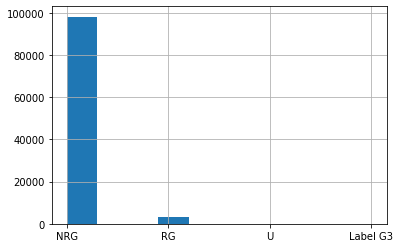

None

In [16]:
#check for class imbalance in df_agreed_g2_g3
df_agreed_g2_g3[5].hist()
display(plt.show())

In [ ]:
#add count of all instances where column index 1 and column index 5 are not the same
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "NRG":
        ct += 1
print(ct)
#count number of RGs in final label
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,5] == "RG":
        ct += 1
print(ct)

In [11]:
import tensorflow as tsr
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten,Dense
from keras.optimizers import Adam


In [ ]:
path="/Users/chaitanyadua/Downloads/folder0/"

In [ ]:
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from keras.metrics import Recall
final_label=df['Final Label'].values
images=[]
labels=final_label
glaucoma_pictures=os.listdir(path)
for image in glaucoma_pictures:
    image_path=path+image
    this_image=Image.open(image_path)
    this_image=this_image.resize((512,512))
    array_img=np.array(this_image)/511
    images.append(array_img)
images=np.array(images)
images_train,images_val,labels_train,labels_val=train_test_split(images,labels,test_size=0.2,stratify=labels)
def augmentation(img):
    img=img.reshape((1,)+img.shape)
    image_augmenter=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    augmented_image=[]
    for iter in image_augmenter.flow(img,batch_size=1):
        augmented_image.append(iter[0])
        if(len(augmented_image)>0):
            break
    augmented_image=np.array(augmented_image)
    return augmented_image[0]

minority_class_indices=[]
minority_samples=0
majority_samples=0
for i in range(len(labels_train)):
    if(labels_train[i]==1):
        minority_class_indices.append(i)    
        minority_samples+=1
    else:
        majority_samples+=1

while True:
    if minority_samples==majority_samples:
        break
    random_minority_index=np.random.choice(minority_class_indices)
    aug_image=augmentation(images_train[random_minority_index])
    aug_image=np.array(aug_image)
    images_train=np.append(images_train, np.expand_dims(aug_image, axis=0), axis=0)
    labels_train=np.append(labels_train,1)
    minority_class_indices.append(images_train.shape[0]-1)
    minority_samples+=1

model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(512,512,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
# model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(images_train,labels_train,epochs=10,validation_data=(images_val,labels_val))
